<a id='top'></a>

# CSCI3022 S22



# Homework 1: Measures of Centrality and Dispersion

## Due Friday, January 28 at 11:59 pm to Canvas and Gradescope
***

**Name**: ________________________________________________________________________

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.
- There are two ways to quickly make a .pdf out of this notebook for Gradescope submission.  Either:
 - Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 - Easier: Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline


## (5 pts) Problem 1: Sampling
***

Suppose we wish to create a data set where CU polls current undergraduate students regarding their satisfaction with the decision to start the Spring 2022 semester the week before MLK day as a fully-remote start.

The Registrar's office contains a list of all currently enrolled students.  They provide this list, with e-mail addresses, to the office of Data Analytics, who consider the following 3 ways to poll:

- A) Send an e-mail to each and every current CU student on the list
- B) For each department at CU, randomly choose 10% of their declared majors and send them an e-mail
- C) Sort the list by the students' Student ID numbers, then send e-mails to exactly 10% of the list by sending it to the 4th, 14th, 24th, 34th, etc. students in the order of the sorted list.

What kinds of samples are *A, B*, and *C*?  Use the definitions from class.  Provide a 1-setence justification or definition for each type as part of your answer.

**Solution:**

- A) is a census sample, since the goal is to describe a property of *current* undergraduates, and we're asking all of them.  Note that if the goal was to describe things that might work for future students, this would be a census sample of the sample *frame*, but not of the entire population.
- B) is stratified, since we're ensuring students are proportionate to another "feature" or category of the data, in this case their declared major departments
- C) is a systematic sample, since it's not every person but it's a very structured and ordered approach which is non-random and might skip students in some meaningful way, based on how ID numbers are numbered.


## (20 pts) Problem 2: Computation (Streaming Means)
***

Data science is often divided into two categories: questions of *what* the best value might be to repreesnt a data problem, and questions of *how* to compute that data value.  Question 1 - and prior lectures - should tell you that computing the mean is valuable!  But *how* do we compute the mean?

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 
<a id='eq1'></a>
$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2 \qquad \tag{Equation 1}
$$

**Part A**:

How many computations - floating point operations: addition, subtraction, multiplication, division each count as 1 operation - are required to compute the mean of the data set with $n$ observations?


**Solution:**

Computing a mean with $n$ observations takes $n-1$ additions followed by a division, for $n$ operations total.

**Part B**:

Now suppose our data is *streaming*- we slowly add observations one at a time, instead of seeing the entire data set at once.  We are still interested in the mean, so if we stream the data set `[4,6,0,10, ...]`, we first compute the mean of the the first data point `[4]`, then we recompute the mean of the first two points `[4,6]`, then we recompute the mean of three `[4,6,0]`, and so forth.

Suppose we recompute the mean from scratch after each and every one of our $n$ observations are one-by-one added to our data set.  How many floating point operations are spent computing (and re-computing) the mean of the data set?

**Solution:**

 This means the first mean takes 1, the second mean takes 2, the third mean takes 3, and so forth.  Once we're computed $n$ sequential means, the total amount of computations is:

$1+2+3+\dots + n= \sum_{i=1}^n i = \frac{n(n+1)}{2}$ computations.  This is *order* $n^2$.

We should be convinced that streaming a mean costs a lot more computer time than just computing once!

In this problem we explore a smarter method for such an _online_ computation of the mean.  

**Result**: The following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$


A proof of this result is in the [Appendix](#Appendix) after this problem, and requires some careful manipulations of the sum $\bar{x}_n$.  Your task will be to computationally verify and utilize this result.

**Part C**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class ([Equation 1](#eq1)). Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class ([Equation 1](#eq1)). You may **not** use any built-in sample mean or variance functions.

In [2]:
#Solution:

def my_sample_mean(xx):
    n = len(xx)
    total = np.sum(xx)
    return total/n

def my_sample_var(xx):
    mean = my_sample_mean(xx)
    centered = xx - mean
    squared = centered**2
    return np.sum(squared)/(len(xx)-1)

**Part D**: Use your functions from Part C to compute the sample mean and sample variance of the following array, which contains the minutes late that the BuffBus is running on Friday afternoon.

`bus = [4, 10, 0, 312, 22, 39, 81, 19, 8, 60, 1,3,80, 42,12,1]`

In [3]:
bus = [4, 10, 0, 312, 22, 39, 81, 19, 8, 60, 1,3,80, 42,12,1]
mean = my_sample_mean(bus)
var = my_sample_var(bus)
print("Sample mean is: ", mean,"; sample variance is: ", var)

Sample mean is:  43.375 ; sample variance is:  5884.516666666666


**Part E**: Implement a third function called `update_mean` that implements the formula discussed after part B. Note that this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$, and returns $\bar{x}_{n}$. A function header and return statement are provided for you. This function may be auto-graded, so please do not change the given header API - the order of inputs matters! If you change it, you might lose points.

Use this function to compute the values that you get from taking the mean of the first buff buses' lateness, the first two buff buses' lateness, the first three buff buses' lateness, and so on up to all of the `bus` data points from **Part D**. Store your streaming bus means in a numpy array called `buffbus_bad_means`.  Report all 16 estimates in `buffbus_bad_means`.

In [4]:
# Given API:
def update_mean(prev_mean, xn, n):
    new_mean = prev_mean + (xn - prev_mean)/n
    return(new_mean)

buffbus_bad_means = []

prior_mean = bus[0]

length_of_loop = np.size(bus)
for i in range(length_of_loop):
    prior_mean = update_mean(prior_mean,bus[i],i+1)
    buffbus_bad_means.append(prior_mean)
buffbus_bad_means = np.array(buffbus_bad_means)

for idx,times in enumerate(buffbus_bad_means):
    print("The first {:.0f} busses have a mean lateness of {:.3f} minutes".format(idx+1,times))

The first 1 busses have a mean lateness of 4.000 minutes
The first 2 busses have a mean lateness of 7.000 minutes
The first 3 busses have a mean lateness of 4.667 minutes
The first 4 busses have a mean lateness of 81.500 minutes
The first 5 busses have a mean lateness of 69.600 minutes
The first 6 busses have a mean lateness of 64.500 minutes
The first 7 busses have a mean lateness of 66.857 minutes
The first 8 busses have a mean lateness of 60.875 minutes
The first 9 busses have a mean lateness of 55.000 minutes
The first 10 busses have a mean lateness of 55.500 minutes
The first 11 busses have a mean lateness of 50.545 minutes
The first 12 busses have a mean lateness of 46.583 minutes
The first 13 busses have a mean lateness of 49.154 minutes
The first 14 busses have a mean lateness of 48.643 minutes
The first 15 busses have a mean lateness of 46.200 minutes
The first 16 busses have a mean lateness of 43.375 minutes


To ensure your function complies with the given API, run this small test, where we suppose we have a mean of $\bar{x}_n = 1$ with the first $2$ data points (`prev_mean`), and we update this with the 3rd ($n=3$) data point which is $x_3=2$:

In [5]:
assert update_mean(1,2,3)==4/3, "Warning: function seems broken."

**Part F**:

How many floating point operations were spent computing the final result in your code in part E?  Is this truly better than the uninformed approach from part B?

**Solution:**

The update_mean function took only 3 operations, and we perform it for all data points after the first ($n-1$ times total).  This means that for a data set that streams in $n$ data point, we preform $3(n-1)$ operations compared to the naive approach taking $\frac{n(n+1)}{2}$ operations.  This is an *order* $n$ operation instead of $n^2$, so the larger the data gets, the more time we save!

On our example with only 12 data points, the naive approach would perform 78 operations and the update_mean function just 33, so we're already saving plenty of time.


**Part G:**
A similar result to the formula preceding part C holds for variance.  In particular, we can write that:

$$
\displaystyle s^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1} = \frac{1}{n(n-1)} \left(n \cdot \sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i \right)^2 \right)
$$

Describe in **words** and/or **psuedocode** how you might adapt the function you made in part **E** to perform running calculations of both variance and mean.  Be very clear as to what the input/instantiation arguments would be as well as what the output arguments would be in addition to any intermediate calculations.

**Solution:**

The main difference is that we'll need to also save knowledge about the $x_i$'s after they've been **squared**.  One way might be something like:

**Function:** update_mean_and_var(new_data, old_sum, old_sum_squared, old_n):

Where we would update:

`new_n=old_n+1`

`new_sum=old_sum+new_data`

`new_sum_squared=old_sum_squared+new_data**2`

`new_mean=(new_sum)/(new_n)`

`new_var=1/(new_n*(new_n-1))*(n*(new_sum_squared)-new_mean**2)`

and then we can print/return whatever we wish out of the new mean/variance and/or the new n, sum of data, and sum of data squared.  We'd only have to save the sums if we wanted, or we could save the mean and variance and reverse engineer the sum values if we want to save memory but do a little more calculation each time step.

<a id='Appendix'></a>

## Appendix 

*Goal*: Prove that 
$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

Note that you can get an expression for $\bar{x}_{n-1}$ by simply replacing $n$ in Equation 1 above with $n-1$.

We'll start with $\bar{x}_n$ and massage it until we get the righthand side of the formula

\begin{eqnarray}
\nonumber \bar{x}_n &=& \frac{1}{n} \sum_{k=1}^n x_k \\
&=& \frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n-1}\frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \left(\frac{1}{n-1} \sum_{k=1}^{n-1} x_k\right) + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \bar{x}_{n-1} + \frac{1}{n}x_n \\
&=& \frac{n}{n}\bar{x}_{n-1} - \frac{1}{n}\bar{x}_{n-1} + \frac{1}{n}x_n \\
&=&  \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} \quad \checkmark
\end{eqnarray}



[Back to top](#top)
<a id='p3'></a>

## (20 pts) Problem 3: Practice (Titanic)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [6]:
filepath = '../Data/titanic_data.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**:
Based on the overall population of passengers, report the proportion that survived.

$$P(Survived=1)$$

In [7]:
filepath = '../data/titanic_data.csv'
df = pd.read_csv(filepath)
df.head()
# print(df.keys())
print("Solution: " + str(df["Survived"].sum()/df["Survived"].count()))

Solution: 0.39281705948372614


**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

**SOLUTION**

If there were class warfare, we would expect that the first class is asserting its privilege over the lower classes, so first class passengers should be more likely to survive.  If there were chivalry, it would be the case that men have lower survival rates than women.  These are not mutually exclusive.

**Part C**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [8]:
dfTitanic = df.dropna(subset=["Survived", "Pclass", "Age", "Sex"])
#dfTitanic.head()
dfTitanic.shape

(714, 12)

**Part D**: Compute the probability of survival of both men and women.  Then, compute the probability of survival of passengers in each of the 3 passenger classes.  Finally, compute the probabilities of survival and men and women *within* each passenger class (all 6 subsets).  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


In [9]:
print("SOLUTION")

for sex in ["male", "female"]:
    survived = dfTitanic.loc[(dfTitanic["Sex"]==sex), "Survived"].sum()
    total = len(dfTitanic.loc[(dfTitanic["Sex"]==sex), "Survived"])
    print("{:>6} Survived: {:.0f}, Total: {:.0f}, Survival Fraction: {:.3f}".format(sex, survived, total, survived/total))

for pc in [1,2,3]:
    survived = dfTitanic.loc[(dfTitanic["Pclass"]==pc), "Survived"].sum()
    total = len(dfTitanic.loc[(dfTitanic["Pclass"]==pc), "Survived"])
    #print(pc, sex, survived, total)
    print("Class {} Survived: {:.0f}, Total: {:.0f}, Survival Fraction: {:.3f}".format(pc, survived, total, survived/total))
        
for pc in [1,2,3]:
    for sex in ["male", "female"]:
        survived = dfTitanic.loc[(dfTitanic["Pclass"]==pc) & (dfTitanic["Sex"]==sex), "Survived"].sum()
        total = len(dfTitanic.loc[(dfTitanic["Pclass"]==pc) & (dfTitanic["Sex"]==sex), "Survived"])
        #print(pc, sex, survived, total)
        print("Class {} {:>6} Survived: {:.0f}, Total: {:.0f}, Survival Fraction: {:.3f}".format(pc, sex, survived, total, survived/total))

SOLUTION
  male Survived: 91, Total: 463, Survival Fraction: 0.197
female Survived: 188, Total: 251, Survival Fraction: 0.749
Class 1 Survived: 108, Total: 168, Survival Fraction: 0.643
Class 2 Survived: 70, Total: 145, Survival Fraction: 0.483
Class 3 Survived: 101, Total: 401, Survival Fraction: 0.252
Class 1   male Survived: 36, Total: 93, Survival Fraction: 0.387
Class 1 female Survived: 72, Total: 75, Survival Fraction: 0.960
Class 2   male Survived: 16, Total: 87, Survival Fraction: 0.184
Class 2 female Survived: 54, Total: 58, Survival Fraction: 0.931
Class 3   male Survived: 39, Total: 283, Survival Fraction: 0.138
Class 3 female Survived: 62, Total: 118, Survival Fraction: 0.525


**Solutions**:
It sure looks like the 39% of survivors are not randomly distributed!  Being in Class 1 helped quite a bit where as Class 2 was slightly above average, leaving Class 3 as many of the deaths.

It also looks like women were more likely to survive, at nearly 75% compared to 20% for men.  This difference was true within each class as well, with both class 1 and 2 women above 90% survival where as men fell from 39% to 18% over those classes.  As a result, even Class 3 women were more likely to survive than Class 1 men.

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the *same set* of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not.  This means that the two axes should overlap. 
* Use the bin edges $[0,3,6,\ldots,75,78,81]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with the color arguments `lawngreen` and the passed with `aqua`.
* As you plot both histograms on a single set of axes you should use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent (`alpha`), so both histograms are visible and their overlap becomes a blend of the two colors.
* Include a legend (`plt.legend` after `label=` on the histograms) and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

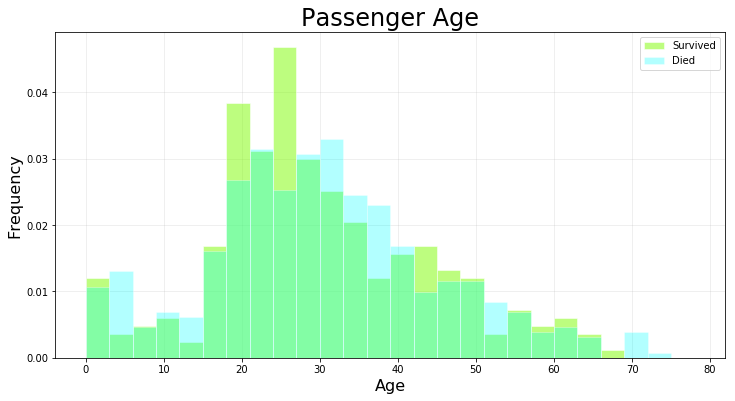

In [10]:
my_bins = range(0,81,3)
fig, ax = plt.subplots(figsize=(12,6))
dfTitanic.loc[dfTitanic["Survived"]==1].hist(column="Age", ax=ax, facecolor="lawngreen", edgecolor="white",bins=my_bins, alpha=0.5, label="Survived", density=True)
dfTitanic.loc[dfTitanic["Survived"]==0].hist(column="Age", ax=ax, facecolor="aqua", edgecolor="white",bins=my_bins, alpha=0.3, label="Died", density=True)
ax.set_xlabel("Age", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_title("Passenger Age", fontsize=24)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend();

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

**Solution:**

It would be misleading to plot these as frequency histograms because there are many more passengers who did not survive the disaster (about 2/3 of them), so the frequency histogram for that data subset would have more area than the frequency histogram for the surviving passengers.

**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

**EXAMPLE**
It is always **very** difficult to attempt to draw *casual* statements out of data.  It is certainly clear that, all else being equal, you were more likely to survive as a woman.  You were also more likely to survive as a higher-class passenger.  It also appears that people ages 16-28 survived at a slightly greater rate than they died at.

But why?  The man/woman split might appear that the men were being chivalrous and making sure that the women got off the boat first... or perhaps that was the pre-written policy of White Star, and it was simply the rules rather than chivalry.  

Similarly, the first class folks were far more likely to survive. Is this because the rich forced the poor out of boats, or that higher-priced cabins tend to be much higher up and closer to the deck of the ship, allowing much quicker access to escape route?  Given our data, we can never know for sure.

We also saw some sort of age bias in survival for the "young adults", which could be due to a conscious attempt or it could be due to a simple healthiness effect (children and older folks may not have been able to handle the arctic waters). It could be a mix of all of these factors. However, it is also entirely possible that we need more information.  The best we can do here is describe patterns, and mere speculate as to what created those patterns.

**Part H**: In lecture we described some types of sampling from a *sample frame*.  Suppose we considered the passenger log the sample frame, and decided to generate smaller samples to work with for computing means and propotions.  Perform the following operations:

1) Since the overall ship had around 65% men, create a *sample* (see `df.sample`) of distinct passengers from the overall ship that consists of exactly 13 randomly chosen men and 7 randomly chosen women.  Report the proportion of those passengers that survived.

2) Repeat the sampling process from part 1) 1000 times.  Report the **mean** survival proportion of those 1000 samples.  Is this close to the survival rate in part A?  Why or why not?

3) What was the name for this kind of sampling?

In [11]:
def randomsamp():
    randmen=dfTitanic.loc[dfTitanic['Sex']=='male'].sample(13)
    randwomen=dfTitanic.loc[dfTitanic['Sex']=='female'].sample(7)
    surv=(np.sum(randmen['Survived']==1)+np.sum(randwomen['Survived']==1))/20
    return surv
manysamples=np.zeros(1000)
for i in range(1000):
    manysamples[i]=randomsamp()


In [12]:
print('Subsample statistics:', pd.Series(manysamples).describe())

Subsample statistics: count    1000.000000
mean        0.391200
std         0.089697
min         0.100000
25%         0.350000
50%         0.400000
75%         0.450000
max         0.650000
dtype: float64


This is an example of a **stratified sample** of this data, which is only selected to guarantee proportional men and women.  Since it doesn't try to stratify according to passenger class (and is also subject to randomness), we see a variety of subsamples ranging from 10% survival to 75% survival.  As a whole though, the subsamples have a mean survival rate of 39.3%, close to that of the larger data frame of 39.2%.  This is very good, and something we'll talk about a lot in this class: often smaller samples still retain the overall properties of the whole, so a group of 20 passengers might be "good enough" to estimate what happens to the larger population!